In [5]:
from glob import glob
train = glob("images/train/*/*.jpg")

In [7]:
import cv2
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing import image
import numpy as np

In [8]:
from tqdm import tqdm
IMG_SIZE = 224
x_train = []
for img in tqdm(train):
    img = load_img(img, target_size=(224, 224), color_mode='rgb')
    img_arr = image.img_to_array(img)
    img_arr = img_arr/255.0
    x_train.append(img_arr)

100%|██████████████████████████████████████████████████████████████████████████████| 2672/2672 [00:44<00:00, 60.51it/s]


In [10]:
x_train = np.asarray(x_train)

In [11]:
np.save("train_data.npy", x_train)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [79]:
label_path = "images/train"

In [80]:
label_list = []
for path in os.listdir(label_path):
    label_list.append(path)

In [81]:
label_list

['Glioma', 'Meningioma', 'Negative', 'Pituitary tumor']

In [96]:
import csv 
Data = glob("images/train/*/*.jpg")
Data_output=list()
Data_output.append(["Classes"])

for file_name in tqdm(Data):
    if file_name[13] == 'G':
        Data_output.append([file_name[13:19]])
    elif file_name[13] == 'M':
        Data_output.append([file_name[13:23]])
    elif file_name[13] == 'N':
        Data_output.append([file_name[13:21]])
    elif file_name[13] == 'P':
        Data_output.append([file_name[13:22]])

100%|██████████████████████████████████████████████████████████████████████████| 2672/2672 [00:00<00:00, 402426.67it/s]


'  \nwith open("./output.csv", "w") as f:\n    writer = csv.writer(f)\n    for val in Data_output:\n        writer.writerows([val])'

In [118]:
with open("label.csv", "w") as f:
    writer = csv.writer(f)
    for val in Data_output:
        writer.writerows([val])

In [15]:
y_train= pd.read_csv("train_label.csv")

In [17]:
y_train.head()

,Classes
0,Glioma
1,Glioma
2,Glioma
3,Glioma
4,Glioma


## for test data

In [18]:
test = glob("images/test/*/*.jpg")

In [5]:
from tqdm import tqdm

In [6]:
from glob import glob
Data_1 = glob("images/test/*/*.jpg")
Data_output_1=list()
Data_output_1.append(["Classes"])

for file_name in tqdm(Data_1):
    if file_name[12] == 'G':
        Data_output_1.append([file_name[12:18]])
    elif file_name[12] == 'M':
        Data_output_1.append([file_name[12:22]])
    elif file_name[12] == 'N':
        Data_output_1.append([file_name[12:20]])
    elif file_name[12] == 'P':
        Data_output_1.append([file_name[12:21]])

100%|██████████████████████████████████████████████████████████████████████████| 2348/2348 [00:00<00:00, 294627.71it/s]


In [8]:
import csv
with open("test_label.csv", "w") as f:
    writer = csv.writer(f)
    for val in Data_output_1:
        writer.writerows([val])

In [ ]:
from tqdm import tqdm
IMG_SIZE = 224
x_test = []
for img in test:
    img = load_img(img, target_size=(224, 224), color_mode='rgb')
    img_arr = image.img_to_array(img)
    img_arr = img_arr/255.0
    x_test.append(img_arr)

In [21]:
x_test = np.asarray(x_test)

In [22]:
x_test.shape

(2348, 224, 224, 3)

In [23]:
# saves the image array in npy file
np.save("test_data.npy", x_test)

In [24]:
y_test = pd.read_csv("test_label.csv")

In [25]:
print(x_train.shape)
print(x_test.shape)

(2672, 224, 224, 3)
(2348, 224, 224, 3)


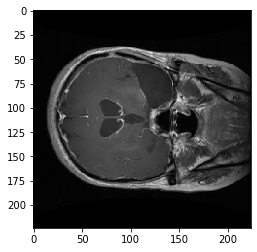

In [27]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])